# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "..Instruction/output_data/worldcities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
firstCity = cities[0]
firstCity

'hermanus'

In [13]:
units = "imperial"
url = f"http://api.openweathermap.org/data/2.5/weather?q={firstCity}&appid={weather_api_key}&units={units}"

lats = []
longs = []
temps = []
humids = []
pressures = []
winds = []
clouds = []
citiesFound = []
counter = 0

for city in cities:
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units={units}"
    try:
        response = requests.get(url).json()
        code = response["cod"]
        if code == 200:  
            citiesFound.append(city)
            lats.append(response["coord"]["lat"])
            longs.append(response["coord"]["lon"])
            temps.append(response["main"]["temp"])
            humids.append(response["main"]["humidity"])
            pressures.append(response["main"]["pressure"])
            winds.append(response["wind"]["speed"])
            clouds.append(response["clouds"]["all"])
        if counter % 50 == 0:
            print(counter)
    except Exception as e:
        print(e)
    counter += 1
    time.sleep(1)

0
50
100
150
200
250
300
350
400
450
500
550
600


In [14]:
df = pd.DataFrame()
df["cities"] = citiesFound
df["latitude"] = lats
df["longitude"] = longs
df["temperature"] = temps
df["humidity"] = humids
df["pressure"] = pressures
df["wind_speed"] = winds
df["cloudiness"] = clouds

df.head()

,cities,latitude,longitude,temperature,humidity,pressure,wind_speed,cloudiness
0,hermanus,-34.42,19.23,61.00,52,1017,1.01,13
1,belmonte,-15.86,-38.88,69.80,94,1016,6.93,20
2,chokurdakh,70.63,147.92,18.97,96,1003,4.63,13
3,provideniya,64.38,-173.30,24.80,73,1010,4.47,90
4,longyearbyen,78.22,15.64,32.00,95,1010,21.92,90


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
df.describe()

,latitude,longitude,temperature,humidity,pressure,wind_speed,cloudiness
count,590.000000,590.000000,590.000000,590.000000,590.000000,590.00000,590.000000
mean,20.235169,15.225695,62.575373,66.532203,1012.766102,8.26839,52.803390
std,32.847813,85.815373,19.210976,23.198665,6.975792,5.66327,37.520005
min,-54.800000,-179.170000,-4.000000,6.000000,965.000000,0.40000,0.000000
25%,-6.922500,-57.395000,50.130000,52.000000,1009.000000,3.78000,16.500000
50%,24.970000,21.420000,64.515000,71.000000,1013.000000,6.93000,60.500000
75%,47.440000,80.515000,77.030000,85.750000,1017.000000,11.41000,90.000000
max,78.220000,179.320000,100.080000,100.000000,1053.000000,29.97000,100.000000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [16]:
mask = df.humidity <= 100
df_sub = df.loc[mask].reset_index(drop=True)

df_sub.head()

,cities,latitude,longitude,temperature,humidity,pressure,wind_speed,cloudiness
0,hermanus,-34.42,19.23,61.00,52,1017,1.01,13
1,belmonte,-15.86,-38.88,69.80,94,1016,6.93,20
2,chokurdakh,70.63,147.92,18.97,96,1003,4.63,13
3,provideniya,64.38,-173.30,24.80,73,1010,4.47,90
4,longyearbyen,78.22,15.64,32.00,95,1010,21.92,90


In [17]:
# Export the City_Data into a csv
df_sub.to_csv("weatherData.csv", index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [20]:
df = pd.read_csv("weatherData.csv")
df.head()

,cities,latitude,longitude,temperature,humidity,pressure,wind_speed,cloudiness
0,hermanus,-34.42,19.23,61.00,52,1017,1.01,13
1,belmonte,-15.86,-38.88,69.80,94,1016,6.93,20
2,chokurdakh,70.63,147.92,18.97,96,1003,4.63,13
3,provideniya,64.38,-173.30,24.80,73,1010,4.47,90
4,longyearbyen,78.22,15.64,32.00,95,1010,21.92,90


## Latitude vs. Temperature Plot

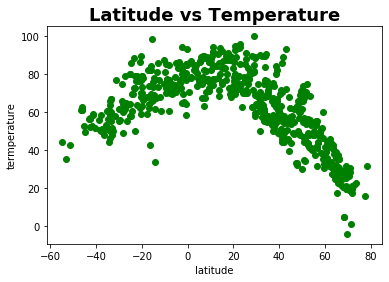

In [27]:
plt.scatter(df.latitude, df.temperature, color="green")
plt.xlabel("latitude")
plt.ylabel("termperature")
plt.title("Latitude vs Temperature", fontsize=18, fontweight="bold")

plt.show()

## Latitude vs. Humidity Plot

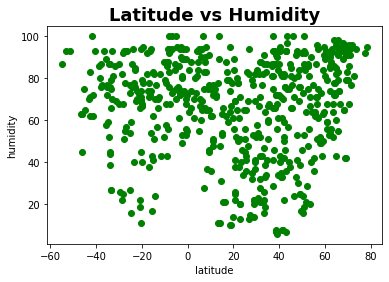

In [31]:
plt.scatter(df.latitude, df.humidity, color="green")
plt.xlabel("latitude")
plt.ylabel("humidity")
plt.title("Latitude vs Humidity", fontsize=18, fontweight="bold")

plt.show()

## Latitude vs. Cloudiness Plot

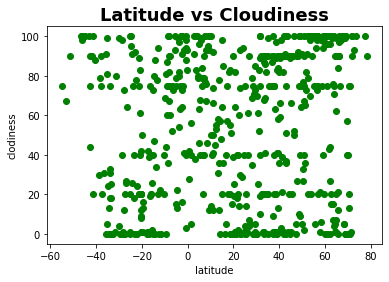

In [30]:
plt.scatter(df.latitude, df.cloudiness, color="green")
plt.xlabel("latitude")
plt.ylabel("clodiness")
plt.title("Latitude vs Cloudiness", fontsize=18, fontweight="bold")

plt.show()

## Latitude vs. Wind Speed Plot

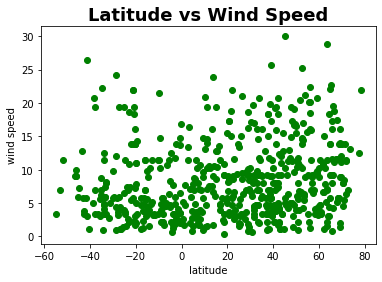

In [29]:
plt.scatter(df.latitude, df.wind_speed, color="green")
plt.xlabel("latitude")
plt.ylabel("wind speed")
plt.title("Latitude vs Wind Speed", fontsize=18, fontweight="bold")

plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [ ]:
# Create Northern and Southern Hemisphere DataFrames

In [34]:
northenHemi_mask = df.latitude >= 0
df_north = df.loc[northenHemi_mask].reset_index(drop=True)

df_north.head()

,cities,latitude,longitude,temperature,humidity,pressure,wind_speed,cloudiness
0,chokurdakh,70.63,147.92,18.97,96,1003,4.63,13
1,provideniya,64.38,-173.30,24.80,73,1010,4.47,90
2,longyearbyen,78.22,15.64,32.00,95,1010,21.92,90
3,kumukh,42.17,47.12,54.66,22,1015,1.77,0
4,khatanga,71.97,102.50,19.63,95,1016,6.33,90


In [35]:
southernHemi_mask = df.latitude < 0
df_south = df.loc[southernHemi_mask].reset_index(drop=True)

df_south.head()

,cities,latitude,longitude,temperature,humidity,pressure,wind_speed,cloudiness
0,hermanus,-34.42,19.23,61.0,52,1017,1.01,13
1,belmonte,-15.86,-38.88,69.8,94,1016,6.93,20
2,olinda,-8.01,-34.86,77.0,94,1013,4.70,90
3,ushuaia,-54.80,-68.30,44.6,87,1004,3.40,75
4,punta arenas,-53.15,-70.92,35.6,93,1007,6.93,67


In [ ]:
import seaborn as sn

In [37]:
north_corrs = df_north.corr()
north_corrs

,latitude,longitude,temperature,humidity,pressure,wind_speed,cloudiness
latitude,1.000000,-0.015512,-0.864766,0.208493,-0.237231,0.167561,0.084798
longitude,-0.015512,1.000000,0.195760,-0.204416,-0.270358,0.078688,0.050028
temperature,-0.864766,0.195760,1.000000,-0.488433,0.061090,-0.080654,-0.136033
humidity,0.208493,-0.204416,-0.488433,1.000000,-0.005123,-0.004581,0.269190
pressure,-0.237231,-0.270358,0.061090,-0.005123,1.000000,-0.049065,-0.228362
wind_speed,0.167561,0.078688,-0.080654,-0.004581,-0.049065,1.000000,0.071793
cloudiness,0.084798,0.050028,-0.136033,0.269190,-0.228362,0.071793,1.000000


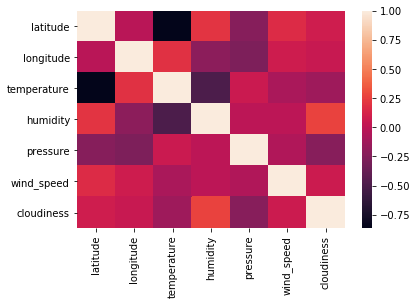

In [39]:
sn.heatmap(north_corrs)

In [38]:
south_corrs = df_south.corr()
south_corrs

,latitude,longitude,temperature,humidity,pressure,wind_speed,cloudiness
latitude,1.000000,-0.132440,0.665402,0.093859,-0.202880,-0.133613,0.111151
longitude,-0.132440,1.000000,0.214337,-0.381119,-0.033675,0.274999,0.096610
temperature,0.665402,0.214337,1.000000,-0.164131,-0.317694,0.202751,0.039025
humidity,0.093859,-0.381119,-0.164131,1.000000,-0.156152,-0.248246,0.190395
pressure,-0.202880,-0.033675,-0.317694,-0.156152,1.000000,0.054694,-0.230996
wind_speed,-0.133613,0.274999,0.202751,-0.248246,0.054694,1.000000,-0.107965
cloudiness,0.111151,0.096610,0.039025,0.190395,-0.230996,-0.107965,1.000000


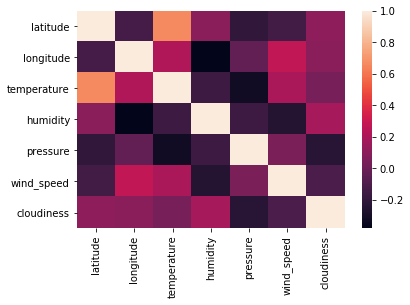

In [40]:
sn.heatmap(south_corrs)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7478198324027903


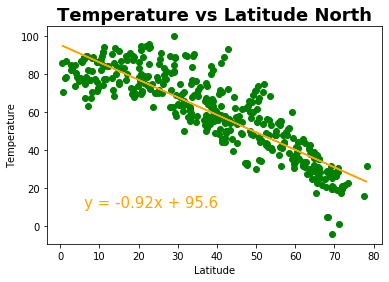

In [60]:
x_values = df_north["latitude"]
y_values = df_north["temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="green")
plt.plot(x_values,regress_values,"r-", color="orange")
plt.annotate(line_eq,(6,10),fontsize=15,color="orange")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Temperature vs Latitude North", fontsize=18, fontweight="bold")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4427591691270394


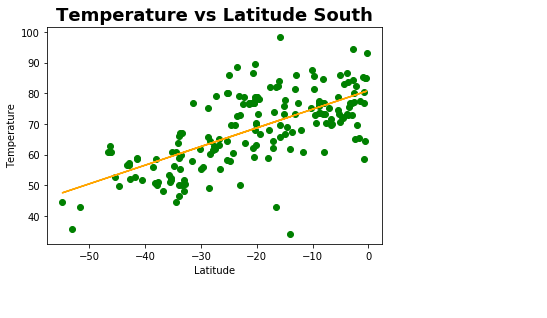

In [61]:
x_values = df_south["latitude"]
y_values = df_south["temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="green")
plt.plot(x_values,regress_values,"r-", color="orange")
plt.annotate(line_eq,(6,10),fontsize=15,color="orange")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Temperature vs Latitude South", fontsize=18, fontweight="bold")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.04346922083313123


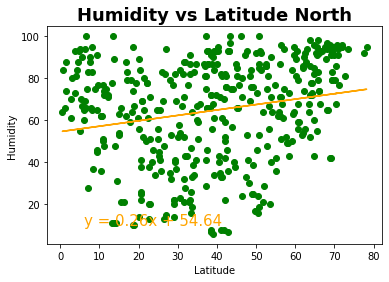

In [62]:
x_values = df_north["latitude"]
y_values = df_north["humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="green")
plt.plot(x_values,regress_values,"r-", color="orange")
plt.annotate(line_eq,(6,10),fontsize=15,color="orange")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs Latitude North", fontsize=18, fontweight="bold")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.008809515878679227


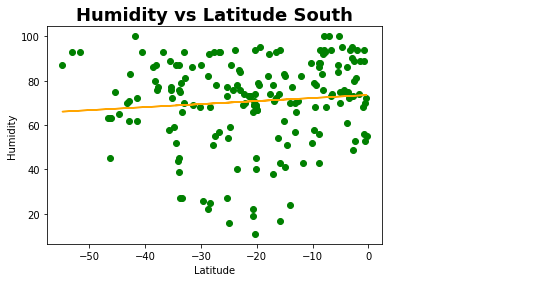

In [63]:
x_values = df_south["latitude"]
y_values = df_south["humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="green")
plt.plot(x_values,regress_values,"r-", color="orange")
plt.annotate(line_eq,(6,10),fontsize=15,color="orange")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs Latitude South", fontsize=18, fontweight="bold")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.007190750046366299


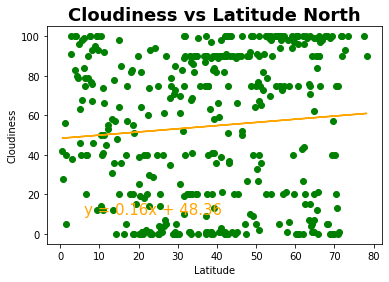

In [64]:
x_values = df_north["latitude"]
y_values = df_north["cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="green")
plt.plot(x_values,regress_values,"r-", color="orange")
plt.annotate(line_eq,(6,10),fontsize=15,color="orange")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs Latitude North", fontsize=18, fontweight="bold")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.012354644101641143


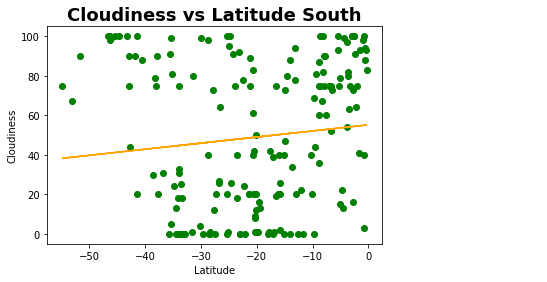

In [65]:
x_values = df_south["latitude"]
y_values = df_south["cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="green")
plt.plot(x_values,regress_values,"r-", color="orange")
plt.annotate(line_eq,(6,10),fontsize=15,color="orange")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs Latitude South", fontsize=18, fontweight="bold")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.028076600346340054


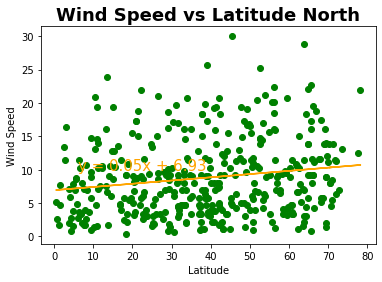

In [66]:
x_values = df_north["latitude"]
y_values = df_north["wind_speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="green")
plt.plot(x_values,regress_values,"r-", color="orange")
plt.annotate(line_eq,(6,10),fontsize=15,color="orange")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed vs Latitude North", fontsize=18, fontweight="bold")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.017852419148460155


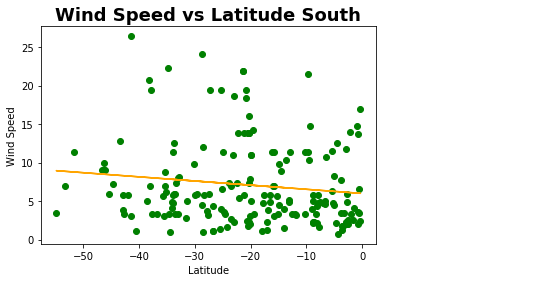

In [67]:
x_values = df_south["latitude"]
y_values = df_south["wind_speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="green")
plt.plot(x_values,regress_values,"r-", color="orange")
plt.annotate(line_eq,(6,10),fontsize=15,color="orange")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed vs Latitude South", fontsize=18, fontweight="bold")
print(f"The r-squared is: {rvalue**2}")
plt.show()